In [1]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib
import io
from keras import models, layers, optimizers, regularizers
import math
import random

import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import files
  
uploaded = files.upload()

Saving jay_input.csv to jay_input.csv


In [2]:
df_train = pd.read_csv(io.BytesIO(uploaded['jay_input.csv']), sep=',', index_col=0)
df_train.head(20)

,item,bid_p,chance
row.names,,,
1,1,35,1
2,2,9,0
3,1,10,1
4,1,22,1
5,2,17,1
6,3,44,1
7,2,28,1
8,3,54,1
9,3,33,0


In [3]:
n_test = int(math.ceil(len(df_train) * 0.3))
random.seed(42)
test_ixs = random.sample(list(range(len(df_train))), n_test)
train_ixs = [ix for ix in range(len(df_train)) if ix not in test_ixs]
train = df_train.iloc[train_ixs, :]
test = df_train.iloc[test_ixs, :]
print(len(train))
print(len(test))

14
6


In [4]:
features = ['bid_p'] #stuff to train
response = 'chance' #label to train over (chance max)
x_train = train[features]
y_train = train[response]
x_test = test[features]
y_test = test[response]

In [5]:
#Assignment system - decides winner 
hidden_units = 10     # how many neurons in the hidden layer
activation = 'sigmoid'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 3       # how many samples to use for each gradient descent update

In [6]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=len(features), units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units, units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.7143
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.7143
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7143
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7143
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7143
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7857
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.7857
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7857
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.7857
Epoch 10/10
1/1 [==============================] - 0s 16ms/step - loss: 0.7888 - accuracy: 0.6667
Training accuracy: 0.7142857313156128


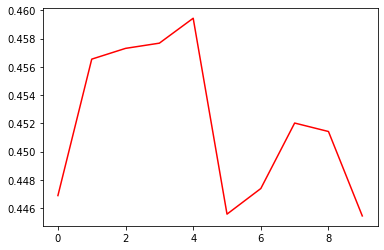

In [29]:
# train the parameters
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]

test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]

print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()


In [21]:
predictions = model.predict([44, 12, 23, 1, 98])

# Print our model's predictions.
print(predictions) # [7, 2, 1, 0, 4]

[[0.8646567 ]
 [0.17756543]
 [0.55799997]
 [0.03268468]
 [0.90627587]]
